In [1]:
### DATASET PERSONALIZADO ###

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import layers, models
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions

In [2]:
image_size=(32, 32)
onehot = OneHotEncoder(sparse=False)

# Caminho para o diretório principal que contém subdiretórios para cada classe
dataset_dir = r'D:\Python\Treino\Fotos_ML'

# Lista para armazenar caminhos das imagens e rótulos
images = []
labels = []

# Iterar sobre as pastas (classes) no diretório do conjunto de dados
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            images.append(image_path)
            labels.append(int(class_folder))  # assumindo que o nome da pasta é o rótulo

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Função para carregar e pré-processar as imagens
def load_and_preprocess_images(image_paths, labels, image_size=image_size):
    images = []
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.resize(img, image_size)
        img = img / 255.0  # Normalizar para o intervalo [0, 1]
        images.append(img)
    return np.array(images), np.array(labels)

# Carregar e pré-processar conjuntos de treino e teste
x_train, y_train = load_and_preprocess_images(x_train, y_train)
x_test, y_test = load_and_preprocess_images(x_test, y_test)

y_train = onehot.fit_transform(y_train.reshape(-1,1))
y_test = onehot.fit_transform(y_test.reshape(-1,1))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(277, 32, 32, 3)
(70, 32, 32, 3)
(277, 2)
(70, 2)


c:\Users\User\anaconda3\envs\base2\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\User\anaconda3\envs\base2\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
28/28 [==============================] - 1s 12ms/step - loss: 0.6894 - accuracy: 0.5343 - val_loss: 0.6506 - val_accuracy: 0.6857
Epoch 2/30
28/28 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.7473 - val_loss: 0.4359 - val_accuracy: 0.8000
Epoch 3/30
28/28 [==============================] - 0s 7ms/step - loss: 0.3255 - accuracy: 0.8592 - val_loss: 0.2446 - val_accuracy: 0.8714
Epoch 4/30
28/28 [==============================] - 0s 7ms/step - loss: 0.2031 - accuracy: 0.9314 - val_loss: 0.2132 - val_accuracy: 0.9429
Epoch 5/30
28/28 [==============================] - 0s 7ms/step - loss: 0.1909 - accuracy: 0.9206 - val_loss: 0.2734 - val_accuracy: 0.8714
Epoch 6/30
28/28 [==============================] - 0s 7ms/step - loss: 0.1643 - accuracy: 0.9386 - val_loss: 0.2018 - val_accuracy: 0.9000
Epoch 7/30
28/28 [==============================] - 0s 7ms/step - loss: 0.0888 - accuracy: 0.9711 - val_loss: 0.1709 - val_accuracy: 0.9000
Epoch 8/30
28/28 [=

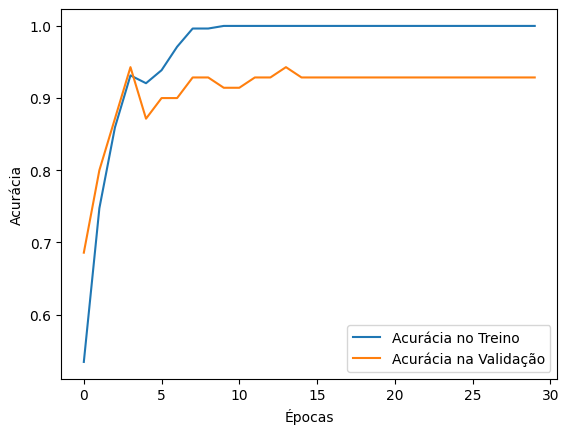

In [3]:
# Criar uma CNN simples
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # ajuste para as dimensões das suas imagens
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  # ajuste para o número de classes no seu conjunto de dados

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, batch_size=10, epochs=30, validation_data=(x_test, y_test), verbose=True)

# Avaliar o desempenho do modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nAcurácia no conjunto de teste: {test_acc}')

# Exibir a curva de aprendizado
plt.plot(history.history['accuracy'], label='Acurácia no Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


1/1 [==============================] - 0s 18ms/step
1: Marcos (98.39%)


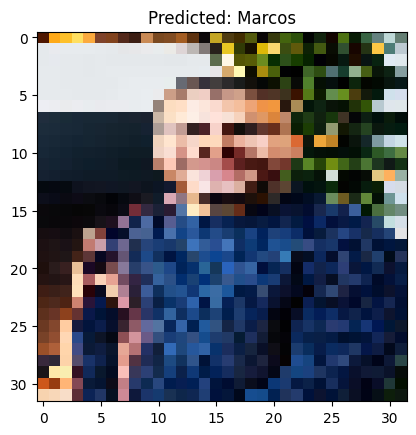

In [6]:
# Carregar e redimensionar a imagem de teste
img_path = r'D:\Python\Treino\ML_Marcos.jpg'  # Substitua pelo caminho da sua própria imagem
img = image.load_img(img_path, target_size=(32, 32))  # Redimensiona para o tamanho esperado pelo modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizar para o intervalo [0, 1]

# Função para decodificar as previsões para o CIFAR-10
def decode_predictions(predictions):
    class_names = ['Marcos', 'Isabelle']
    decoded_predictions = []
    for pred in predictions:
        class_index = np.argmax(pred)
        class_name = class_names[class_index]
        decoded_predictions.append((class_index, class_name, pred[class_index]))
    return decoded_predictions

# Fazer uma previsão
predictions = model.predict(img_array)

# Decodificar as previsões usando a função personalizada
decoded_predictions = decode_predictions(predictions)

# Exibir as previsões
for i, (class_index, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2%})")

# Exibir a imagem
plt.imshow(img)
plt.title(f'Predicted: {decoded_predictions[0][1]}')
plt.show()
